In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [4]:
# Download stock data for Visa Inc. (V)
ticker = 'V'
start_date = '2005-01-01'
end_date = '2023-04-03'
df = yf.download(ticker, start=start_date, end=end_date, interval="1mo")


[*********************100%***********************]  1 of 1 completed


In [68]:
# Save the data to a CSV file

# filename = f'{ticker}_{start_date}_{end_date}.csv'
# df.to_csv(filename)

In [5]:
df.drop("Volume", axis=1, inplace=True)
df["Price"] = df.mean(axis=1)
data = pd.Series(df["Price"]) 
data = data.dropna() 

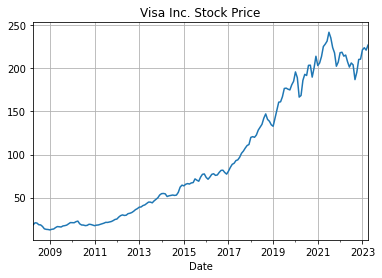

In [6]:
# Plot the data
data.plot(title='Visa Inc. Stock Price')
plt.grid()

In [7]:
data.describe()

count    181.000000
mean      95.056816
std       73.854418
min       12.332461
25%       24.975716
50%       71.638284
75%      167.213455
max      242.122318
Name: Price, dtype: float64

In [8]:
data_copy = data.copy()

In [73]:
data

Date
2008-04-01     18.341222
2008-05-01     20.638327
2008-06-01     20.324307
2008-07-01     18.372115
2008-08-01     18.161568
                 ...    
2022-12-01    210.844772
2023-01-01    221.650000
2023-02-01    224.116016
2023-03-01    221.312003
2023-04-01    227.301999
Name: Price, Length: 181, dtype: float64

In [9]:
# Split the data into training and test sets
train_size = int(len(data) * 0.80)
train_data = data[:train_size]
test_data = data[train_size:]
test_size = len(test_data)

ADF Statistic: 2.033073
p-value: 0.998714
All adfuller values: (2.033072938117329, 0.9987144148335451, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 655.8545791103406)


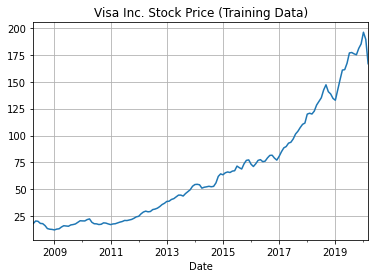

In [10]:
# Augmented Dickey-Fuller test
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('All adfuller values:', result)
train_data.plot(title='Visa Inc. Stock Price (Training Data)')
plt.grid()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


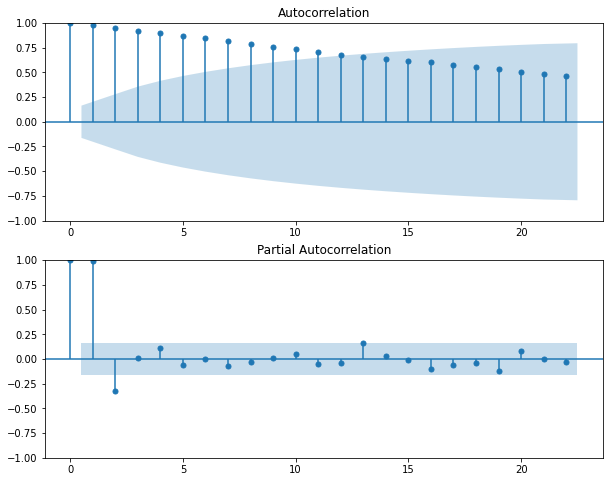

In [11]:
# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data, ax=ax1)
plot_pacf(train_data, ax=ax2)
plt.show()

ADF Statistic: -2.471310
p-value: 0.122612
All adfuller values: (-2.471310153351048, 0.1226118219267115, 13, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 654.481274974497)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


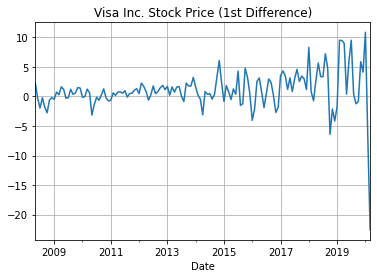

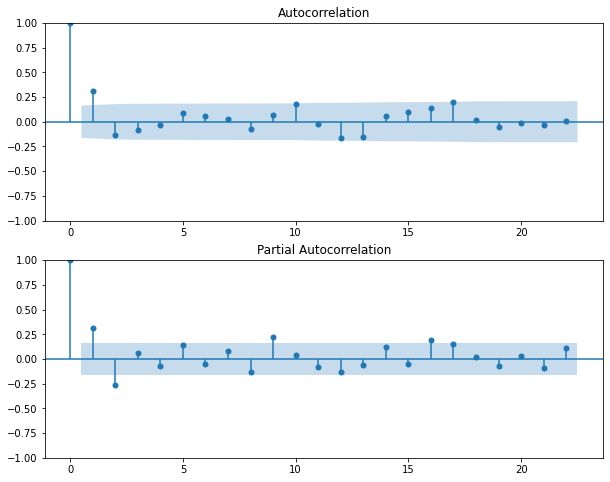

In [12]:
# Difference the data
train_data_diff = train_data.diff().dropna()
train_data_diff.plot(title='Visa Inc. Stock Price (1st Difference)')
plt.grid()

# Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(train_data_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('All adfuller values:', result_diff)


# Plot the ACF and PACF of the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data_diff, ax=ax1)
plot_pacf(train_data_diff, ax=ax2)
plt.show()

ADF Statistic: -4.984895
p-value: 0.000024
All values: (-4.98489530754668, 2.3772563235560366e-05, 14, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, 642.4741138126296)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


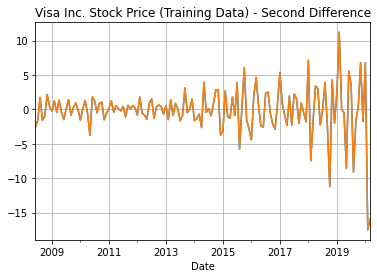

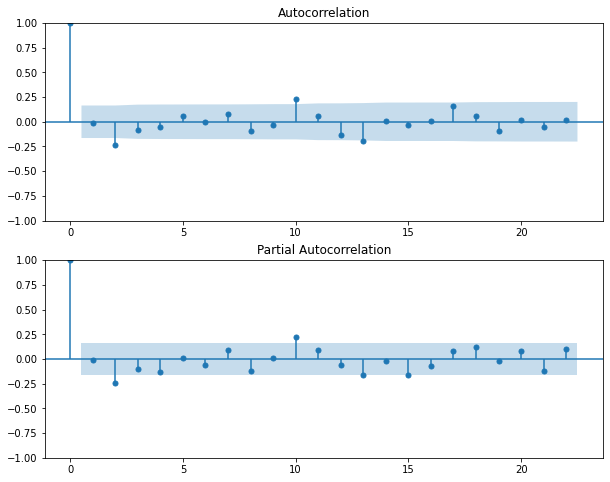

In [13]:
# Difference the data again
train_data_diff2 = train_data_diff.diff().dropna()
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')

# Augmented Dickey-Fuller test on second differenced data
result_diff2 = adfuller(train_data_diff2)
print('ADF Statistic: %f' % result_diff2[0])
print('p-value: %f' % result_diff2[1])
print('All values:', result_diff2)
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')
plt.grid()

# PACF and ACF plots on second differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data_diff2, ax=ax1)
plot_pacf(train_data_diff2, ax=ax2)
plt.show()

In [43]:
model_fit = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit() # (p, d, q), (P, D, Q, S)
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -342.407
Date:                            Thu, 06 Apr 2023   AIC                            694.814
Time:                                    15:19:33   BIC                            709.190
Sample:                                04-01-2008   HQIC                           700.656
                                     - 03-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1775      0.119     -1.496      0.135      -0.410       0.055
ma.L1          0.7774      0.091      8.501      0.000       0.598       0.957
ar.S.L12      -0.4313      0.120     -3.608      0.000      -0.666      -0.197
ma.S.L12      -0.4277      0.163     -2.620      0.009      -0.748      -0.108
sigma2        10.1315      0.849     11.928      0.000       8.467      11.796
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               322.79
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              21.35   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

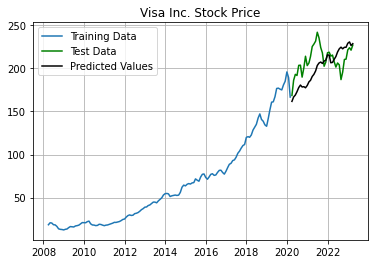

In [44]:
predictions = model_fit.predict(start=train_size, end=train_size+test_size-1) 

# Plot the predictions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data', color='green')
plt.plot(predictions, label='Predicted Values', color='black')
plt.title('Visa Inc. Stock Price')
plt.legend()
plt.grid()
plt.show()
